# 광고 데이터 분석

## 분석목표 :
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 데이터 전처리
2. 데이터 탐색
3. 시각화
4. 데이터 분석

### 1. 데이터 전처리
- 학습목표 : 
    1. read_excel 함수를 사용하여 파이썬에 데이터 불러오기
    2. 데이터 프램임의 열 단위 수치연산 및 데이터 타입 다루기

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

#### read_excel함수를 사용하여 파이썬에 데이터 불러오기
- 파이썬의 디렉토리 경로 구분자 : 슬래시
- 운영체제별 디렉토리 경로구분자 : 
    1. 맥의 경우 : 슬래시
    2. 윈도우의 경우 : 역슬래시

In [2]:
df=pd.read_excel("./네이버보고서.xls",skiprows = {0})
df.head(7)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
5,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
6,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560


In [3]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [4]:
df=pd.read_excel("./네이버보고서.xls",skiprows = {1})
df.head(7)

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
5,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
6,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560


In [5]:
df=pd.read_excel("./네이버보고서.xls",skiprows = {0,2,4})
df.head(7)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
2,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560
5,2. C언어 일반,C언어,271370,153.6,0.056602,5269.257812,809358
6,프로그래밍 전체_파워컨텐츠_블록체인(삭제),가상화폐,91369,2838.0,3.106086,283.217054,803770


#### 결측치 확인

In [6]:
df.isnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1374,False,False,False,False,False,False,False
1375,False,False,False,False,False,False,False
1376,False,False,False,False,False,False,False
1377,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [8]:
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1374    0
1375    0
1376    0
1377    0
1378    0
Length: 1379, dtype: int64

### 데이터 프레임의 열 단위 수치연산 및 데이터 타입 다루기
- 클릭수 (반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용 (VAT포함,원)

In [9]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
2,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560


- 클릭수 : 한번의 클릭이 총 몇 번 이루어졌는지 나타내는 지표
    
    => 반올림처리, 일의 자리수로 변경

In [10]:
clk = round(df['클릭수'],0)

In [11]:
clk

0       8058.0
1       1864.0
2        814.0
3        260.0
4        271.0
         ...  
1374       0.0
1375       0.0
1376       0.0
1377       0.0
1378       0.0
Name: 클릭수, Length: 1379, dtype: float64

#### round함수 활용 예제

In [12]:
print (round(9606.14574,-3))

10000.0


In [13]:
clk[4]

271.0

In [14]:
clk[5]

154.0

In [15]:
#소수점 제거

In [16]:
clk.astype(int)

0       8058
1       1864
2        814
3        260
4        271
        ... 
1374       0
1375       0
1376       0
1377       0
1378       0
Name: 클릭수, Length: 1379, dtype: int32

In [17]:
df['클릭수']=clk.astype(int)

In [18]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
2,3. html,HTML,9626374,814,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271,0.048242,3243.215339,879560


- 클릭수 : CTR = 클릭수 / 노출수 * 100
   
   => 클릭수가 변경되어 기준 클릭률(%) 열 데이터 변경 필요

In [19]:
df['클릭수']/df['노출수']*100

0       1.049915
1       0.268547
2       0.008456
3       0.067616
4       0.048207
          ...   
1374    0.000000
1375    0.000000
1376    0.000000
1377    0.000000
1378    0.000000
Length: 1379, dtype: float64

In [20]:
df['클릭률(%)'] = df['클릭수']/df['노출수']*100

In [21]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
2,3. html,HTML,9626374,814,0.008456,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260,0.067616,3705.360983,964876
4,1. 코딩,코딩,562162,271,0.048207,3243.215339,879560


- 평균클릭비용 => 반올림

In [22]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
2,3. html,HTML,9626374,814,0.008456,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260,0.067616,3705.360983,964876
4,1. 코딩,코딩,562162,271,0.048207,3243.215339,879560


In [23]:
cpc = round(df['평균클릭비용(VAT포함,원)'],0)

In [24]:
df['평균클릭비용(VAT포함,원)']=cpc.astype(int)

In [25]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
2,3. html,HTML,9626374,814,0.008456,1408,1145903
3,6. 파이썬,파이썬,384522,260,0.067616,3705,964876
4,1. 코딩,코딩,562162,271,0.048207,3243,879560


## 데이터 탐색

### 판다스를 활용한 데이터 탐색 실습

- 학습목표 : 
    1. 데이터 탐색 과정에서 사용되는 함수를 살펴보고 실전 사례를 통해 사용법을 익힌다.

In [26]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [27]:
df=pd.read_excel("./네이버보고서.xls",skiprows = {0})
df.head(7)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
5,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
6,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560


In [28]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [29]:
df.head(10)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
5,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
6,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560
7,2. C언어 일반,C언어,271370,153.6,0.056602,5269.257812,809358
8,프로그래밍 전체_파워컨텐츠_블록체인(삭제),가상화폐,91369,2838.0,3.106086,283.217054,803770
9,AOP 전체_중복키워드_디자인,포토샵,1887822,393.6,0.020849,1913.737297,753247


In [30]:
df.tail()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.0,0.0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.0,0.0,0
1378,마케팅KPI수립,LTV,32602,0.0,0.0,0.0,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.0,0.0,0
1380,4. 웹의 동작,REST,61193,0.0,0.0,0.0,0


In [31]:
df.tail(10)

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1371,7. 운영체제,가상머신,16605,0.0,0.0,0.0,0
1372,파이낸스 전체,부동산책,16722,0.0,0.0,0.0,0
1373,ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제),VD,17504,0.0,0.0,0.0,0
1374,AOP 전체_중복키워드_디자인,포토샵단축키,18818,0.0,0.0,0.0,0
1375,올인원 패키지 : 업무자동화_3. 엑셀,SUMIF,23549,0.0,0.0,0.0,0
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.0,0.0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.0,0.0,0
1378,마케팅KPI수립,LTV,32602,0.0,0.0,0.0,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.0,0.0,0
1380,4. 웹의 동작,REST,61193,0.0,0.0,0.0,0


In [32]:
df.shape

(1381, 7)

In [33]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352871,981.631682,3.791958e+04
std,2.964650e+05,387.502772,1.000468,1372.390031,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.007152,64.166667,7.700000e+01
50%,3.805000e+03,3.600000,0.061031,395.976793,2.123000e+03
75%,1.073400e+04,14.400000,0.237026,1302.812500,1.743500e+04
max,9.626374e+06,9606.000000,13.587402,9362.527778,2.512444e+06


In [34]:
pd.set_option('display.float_format','{:.2f}'.format)

In [35]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.53,0.35,981.63,37919.58
std,296465.03,387.50,1.00,1372.39,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.20,0.01,64.17,77.00
50%,3805.00,3.60,0.06,395.98,2123.00
75%,10734.00,14.40,0.24,1302.81,17435.00
max,9626374.00,9606.00,13.59,9362.53,2512444.00


In [36]:
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [37]:
df['광고그룹'].unique()

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [38]:
len(df['광고그룹'].unique())

186

In [39]:
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [40]:
len(df['키워드'].unique())

1112

In [41]:
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
1. 전체                            26
                                 ..
올인원 패키지 : 영상 제작/편집_7.에프터이펙트       1
Hyperledger Fabric 프로젝트 CAMP      1
4. css                            1
올인원 패키지 : 디지털 마케팅_2. 페이스북 광고      1
자율주행 연구를 위한 ROS·SLAM Workshop     1
Name: 광고그룹, Length: 186, dtype: int64

In [42]:
df['키워드'].value_counts()

-          8
포토샵        5
구글광고       5
GUI        5
퍼포먼스마케팅    4
          ..
네이버교육      1
멀티쓰레드      1
강화학습       1
리눅스란       1
사이트제작      1
Name: 키워드, Length: 1112, dtype: int64

In [43]:
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

## 시각화를 통한 데이터 탐색 실습
- 학습목표 : 
    1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다.
    2. 데이터를 가공, 처리하여 시각화를 진행한다.

- 시리즈 시각화

In [44]:
import pandas as pd
from matplotlib import font_manager, rc
import platform

In [45]:
import matplotlib.pyplot as plt

In [46]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [47]:
type(df['노출수'])

pandas.core.series.Series

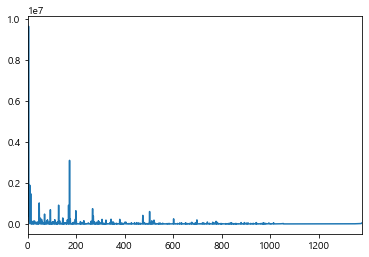

In [48]:
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터 시각화 진행
    1. as-is : index를 기준으로 출력 (그래프의 x축이 시리즈의 인덱스)
    
    2. to-be : 정렬된 value를 수치 순서대로 출력
        
        2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
        
        2-2. 정렬된 데이터의 형태대로 index재생성 후 시각화

In [49]:
dict_data={"철수":[1,2,3,4],"영희":[2,3,4,5],"민수":[3,4,5,6],"수진":[4,5,6,7]}
data=DataFrame(dict_data)

In [50]:
data['철수']

0    1
1    2
2    3
3    4
Name: 철수, dtype: int64

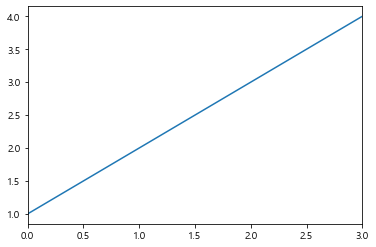

In [51]:
data['철수'].plot()
plt.show()

인덱스 기준으로 정렬된 것을 볼 수 있음

하지만 우리는 정렬된  value 기준으로 출력하는 것이 데이터의 패턴을 더 정확하게 파악할 수 있음

In [52]:
imp_sort = df['노출수'].sort_values()

In [53]:
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [54]:
imp_sort=imp_sort.reset_index()

In [55]:
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [56]:
imp_sort.drop('index',axis=1)

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


In [57]:
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [58]:
imp_sort.drop('index',axis=1,inplace=True)

In [59]:
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


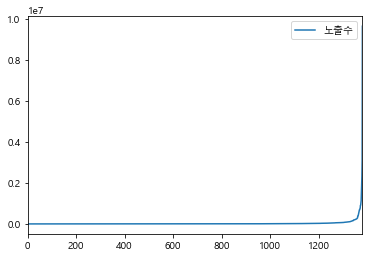

In [60]:
imp_sort.plot()
plt.show()

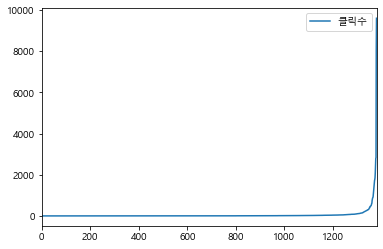

In [61]:
((df['클릭수'].sort_values().reset_index()).drop("index",axis=1)).plot()
plt.show()

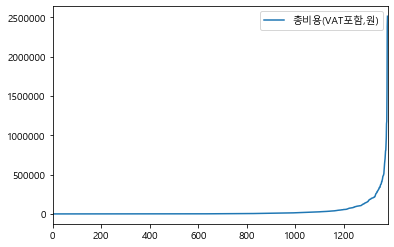

In [86]:
((df['총비용(VAT포함,원)'].sort_values().reset_index()).drop("index",axis=1)).plot()
plt.show()

## 데이터 분석
- 학습목표 : 
    1. 파이썬과 판다스를 사용하여 데이터를 처리, 분석할 수 있다.

### 중점관리 키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출
    1. 95백분위수 찾기(quantille 함수 사용)
    
    2. 95백분위수 이상 (상위 5%)의 노출수 추출
    
    3. 상위 5%에 해당하는 키워드 추출

In [63]:
imp=df["노출수"]

In [64]:
imp.quantile()

3805.0

quantile 함수의 default : 중앙값

In [65]:
print (imp.quantile(0)) #0은 최소값
print(imp.min())

1001.0
1001


In [66]:
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [68]:
imp.quantile(0.95) #95백분위수

82858.0

95백분위수 이상의 노출수 추출

In [69]:
imp=imp[imp>=imp.quantile(0.95)]

In [70]:
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

###### 노출수에 따른 키워드 추출
- 기존 상위 노출수 추출과정 : 데이터프레임의 기본 숫자 인덱스
- 데이터 프레임의 인덱스를 "키워드"로 설정

*노출수로 키워드 찾지 말고 인덱스로 찾을 것

In [71]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


In [72]:
df_index = df.set_index("키워드")

In [74]:
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0.00,0.00,0.00,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0.00,0.00,0.00,0
LTV,마케팅KPI수립,32602,0.00,0.00,0.00,0


In [75]:
imp = df_index['노출수']

In [76]:
imp=imp[imp>=imp.quantile(0.95)]
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [77]:
clk = df_index['클릭수']

In [78]:
clk=clk[clk>=clk.quantile(0.95)]
clk

키워드
-         9606.00
-         8058.00
일러스트       324.00
-         1863.60
HTML       813.60
            ...  
재태크        126.00
모스자격증      198.00
펀드하는법      248.40
채권투자       135.60
주식투자하는법    120.00
Name: 클릭수, Length: 70, dtype: float64

### 중점관리키워드 선별
- 노출수와 클릭수 모두 95백분위수 이상

### 조건이 여러개일 경우
- 데이터프레임[(조건문) &(조건문)]

In [79]:
imp = df_index["노출수"]
clk = df_index["클릭수"]

In [82]:
result = df_index[(imp >=imp.quantile(0.95))&(clk >=clk.quantile(0.95))]

In [83]:
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
파이썬,6. 파이썬,384522,260.40,0.07,3705.36,964876
코딩,1. 코딩,562162,271.20,0.05,3243.22,879560
C언어,2. C언어 일반,271370,153.60,0.06,5269.26,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838.00,3.11,283.22,803770


In [85]:
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### 저효율 키워드
- 상위 5%를 제외한 키워드 아닌가??

    1. 노출수 95 백분위수 미만
    
    2. 클릭수 95 백분위수 미만
    
    3. 총비용 85 백분위수 이상
    
    4. 총비용 95 백분위수 미만

In [87]:
cost=df_index["총비용(VAT포함,원)"]